# E- commerce Customer Churn Analysis

#### Problem Statement

To develop an e-commerce customer churn model using historical churn data taken from Kaggle. This is binary classification (churn/not churn) model by the help of 20 variables (mix of numeric and categorical). 

#### Proposed Business Impact:

This model will help to understand churn drivers by help of variable importance / variable significance. Finding of this model can be used for strategic implementation to retain a customer proactively . 

 Preprocessing:
 
     • Duplicates Removal
     • Missing Value Imputation
     • Categorical variable encoding
     • Scaling and Standardization
     • Outliers Treatment
     • Variable Transformation

Model Building:
                
    •	Naive Bayes
    •	K Neariest Nabiours
    •	Logistic Regression
    •	Support Vector Machines
    •	LightGBM
    •	Random Forest

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import gc
from sklearn.model_selection import GridSearchCV


from scipy.special import boxcox1p
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import auc
#from sklearn.metrics import plot_confusion_metrics

import warnings
warnings.filterwarnings('ignore')

C:\Users\shasuman\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shasuman\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\shasuman\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import numpy as np

In [3]:
np.__version__

'1.19.5'

In [12]:
# reading data set
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name = "E Comm")

In [13]:
df.shape

(5630, 20)

In [14]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [15]:
df.drop('CustomerID',axis = 1, inplace= True)

## Preprocessing
    - Duplicates Removal

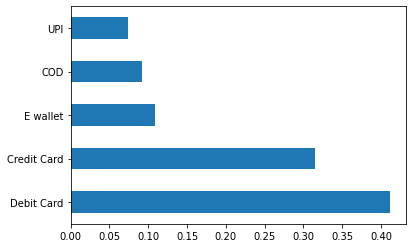

In [28]:
df['PreferredPaymentMode'].value_counts(normalize=True).plot(kind='barh');

In [51]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('Cash on Delivery','COD')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC','Credit Card')

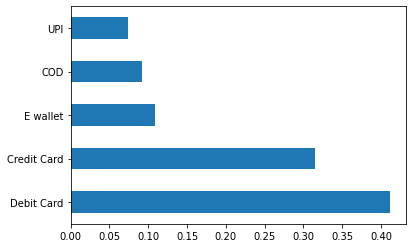

In [30]:
df['PreferredPaymentMode'].value_counts(normalize=True).plot(kind='barh');

### PreferredLoginDevice
        - Issue: Mobile Phone and Phone

<AxesSubplot:xlabel='PreferredLoginDevice', ylabel='Count'>

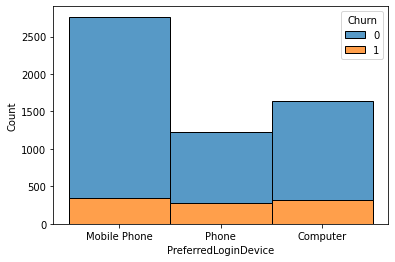

In [33]:
sns.histplot(binwidth=0.5, x='PreferredLoginDevice', hue='Churn', data=df, stat='count', multiple='stack')

<AxesSubplot:xlabel='PreferredLoginDevice', ylabel='Count'>

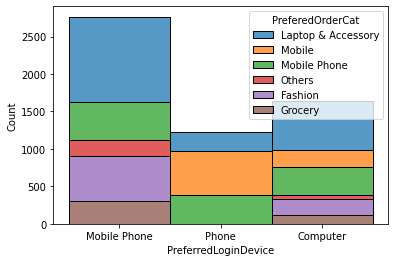

In [216]:
sns.histplot(binwidth=0.8, x='PreferredLoginDevice', hue='PreferedOrderCat', data=df, stat='count', multiple='stack')

In [217]:
# checking for duplicate row
df.sort_values(df.columns.tolist(), inplace = True)
df[df.duplicated(keep=False)]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1045,0,0.0,Computer,1,NaN,Credit Card,Male,2.0,3,Mobile,1,Single,3,0,13.0,0.0,1.0,2.0,125.80
2515,0,0.0,Computer,1,NaN,Credit Card,Male,2.0,3,Mobile,1,Single,3,0,13.0,0.0,1.0,2.0,125.80
39,0,0.0,Computer,1,NaN,Credit Card,Male,3.0,4,Mobile,3,Married,2,1,15.0,0.0,1.0,1.0,125.66
1509,0,0.0,Computer,1,NaN,Credit Card,Male,3.0,4,Mobile,3,Married,2,1,15.0,0.0,1.0,1.0,125.66
1192,0,0.0,Computer,1,NaN,Debit Card,Female,2.0,3,Mobile,1,Single,1,1,14.0,1.0,1.0,2.0,123.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1,NaN,Phone,1,13.0,Debit Card,Male,3.0,3,Mobile,5,Single,4,1,14.0,0.0,1.0,3.0,121.66
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
1359,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
1172,1,NaN,Phone,2,26.0,Credit Card,Female,3.0,3,Mobile,4,Married,1,1,11.0,0.0,1.0,4.0,121.48


#### We have few duplicate rows. 
#### Before dropping them let's check the distribution of our target with and without duplicates

<AxesSubplot:>

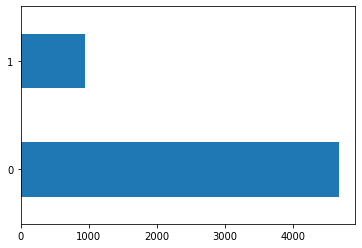

In [49]:
df['Churn'].value_counts().plot(kind='barh')  

<AxesSubplot:>

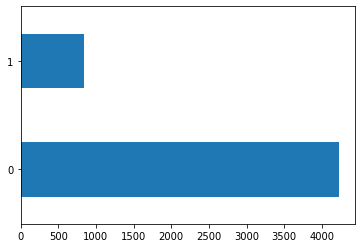

In [219]:
df.drop_duplicates()['Churn'].value_counts().plot(kind='barh')

#### There is a slight drop in Churn class , which is minority class so we descide not to drop those rows, also our data size is quite  small, so it will not impact much

In [220]:
## X and y split
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [221]:
## Preparing list of columns for above functions
missing_columns = [col for col in X.columns if X[col].isna().sum() > 0]
cat_cols = df.drop('Churn', axis=1).select_dtypes('O').columns.tolist()
num_cols = df.drop('Churn', axis=1).select_dtypes('number').columns.tolist()

## Train Test split

In [222]:
def get_train_test(test_size=0.2):
    """
    This function splits the data into train and test set while maintaing the distributation of the target class
       
    """
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=test_size,
                                                    random_state=214)
    return X_train, X_test, y_train, y_test

### Utility functions

  we will use following functions to preprocess and train different models

#### Missing value imputation

We will use impute_missing fuction to impute missing values. It performs following tasks:
Impute missing values based on method defined. We can use following methods:

        - constant
        - median
        - XGBoost
        - Random Forest

In [223]:
def get_df(imputer, X_train, X_test):
   
    X_train_imputed = imputer.transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
    X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

    del X_train_imputed, X_test_imputed
    gc.collect()
    
    return X_train, X_test


def impute_missing(columns, X_train, X_test, method='constant', get_indicator=False, cat=cat_cols):
    """
    This function imputes the missing values of both train and test dataset
    
    parameters: 
    
    columns - list of columns containing missing values
    
    X_train -  Training set independent variables
    
    X_test - Test set independent variables
    
    get_indicator - whether to add a indicator for missing values. False by default
    
    cat - List of categorical columns. This must be passed if method is xgb or rf
    
    returns: 
    
    X_train - processed X_train
    
    X_test - processed X_test
    
    """
    
    if get_indicator:
        
#       Add additional column which indicate which value was missing
        for col in columns:
        
            X_train[col + '_missing'] = 0
            X_train.loc[X_train[col].isna(), col + '_missing'] = 1

            X_test[col + '_missing'] = 0
            X_test.loc[X_test[col].isna(), col + '_missing'] = 1
            
        impute_missing(columns, X_train, X_test, method=method, get_indicator=False)
        
    else:
#       Fill missing values with constant value (-1 in this case)
        if method == 'constant':
        
            X_train.fillna(-1, inplace=True)
            X_test.fillna(-1, inplace=True)
        
#       Fill missing values with median value of that variable
        elif method == 'median':
        
            for col in columns:
                
                # Calculate the median
                median = X_train[col].median()
                
                X_train[col] = X_train[col].fillna(median)
                X_test[col] = X_test[col].fillna(median)
        
#       Use XGBoost algorithm to fill missing values 
        elif method == 'xgb':
        
            X_train_tmp, X_test_tmp = encode_categories(cat, X_train, X_test, method='target')
            
            imputer = IterativeImputer(estimator=XGBRegressor(random_state=214))
            imputer.fit(X_train_tmp)
            
            X_train_tmp, X_test_tmp = get_df(imputer, X_train_tmp, X_test_tmp)
            
            X_train_tmp.drop(cat, axis=1, inplace=True)
            X_test_tmp.drop(cat, axis=1, inplace=True)
            
            X_train_tmp.reset_index(drop=True, inplace=True)
            X_test_tmp.reset_index(drop=True, inplace=True)
            
            X_train = X_train[cat]
            X_test = X_test[cat]
            
            X_train.reset_index(drop=True, inplace=True)
            X_test.reset_index(drop=True, inplace=True)
            
            X_train = pd.concat([X_train, X_train_tmp], axis=1)
            X_test = pd.concat([X_test, X_test_tmp], axis=1)
        
#       Use Random Forest to fill missing values
        else:
        
            X_train_tmp, X_test_tmp = encode_categories(cat, X_train, X_test, method='target')
            
            imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=214, n_jobs=-1))
            imputer.fit(X_train_tmp)
            
            X_train_tmp, X_test_tmp = get_df(imputer, X_train_tmp, X_test_tmp)
            
            X_train_tmp.drop(cat, axis=1, inplace=True)
            X_test_tmp.drop(cat, axis=1, inplace=True)
            
            X_train_tmp.reset_index(drop=True, inplace=True)
            X_test_tmp.reset_index(drop=True, inplace=True)
            
            X_train = X_train[cat]
            X_test = X_test[cat]
            
            X_train.reset_index(drop=True, inplace=True)
            X_test.reset_index(drop=True, inplace=True)
            
            X_train = pd.concat([X_train, X_train_tmp], axis=1)
            X_test = pd.concat([X_test, X_test_tmp], axis=1)
            
    return X_train, X_test

#### Categorial variable encoding
We will use encode_categories fuction to encode categorical variables. It performs following tasks:
   -Encode categorical variables based on method defined. We can use following methods:
       
       - One hot encoding
       - Label encoding
       - Target encoding

In [224]:
def encode_categories(columns, X_train, X_test, method='ohe'):
    """
    This function encode categorical variables of both train and test dataset
    
    parameters: 
    
    columns - list of categorical variables
    
    X_train -  Training set independent variables
    
    X_test - Test set independent variables
    
    method - Method to use for encoding categorical variables. Available methods are:
             - ohe     : Use one hot encoding
             - label   : Use label encoding
             - target  : Use target encoding
             
    returns: 
    
    X_train - processed X_train
    
    X_test - processed X_test
             
    """
#   One hot encoding
    if method == 'ohe':
        X_train = pd.get_dummies(X_train, columns)
        X_test = pd.get_dummies(X_test, columns)
    
#   Label encoding
    elif method == 'label':

        for col in columns:
            
            le = LabelEncoder()
            le.fit(X_train[col])
            
            X_train[col] = le.transform(X_train[col])
            X_test[col] = le.transform(X_test[col])

#   Target encoding
    else:
        encoder = ce.TargetEncoder(cols=columns)
        encoder.fit(X_train, y_train)
        
        X_train = encoder.transform(X_train)
        X_test = encoder.transform(X_test)
        
    return X_train, X_test

## Train and evaluate the model

In [225]:
def get_performance(model, X_train, X_test, y_train, y_test):
    """
    This function is helper for train_and_test_default function. It evaluates the model on test set and print the performance
    
    parameters: 
    
    model - Model object that needs to be evaluated
    
    X_train -  Training set independent variables
    
    X_test - Test set independent variables
    
    y_train - Dependent variable for training
    
    y_test - Dependent variable for evaluating
    
    """
    
    model.fit(X_train,y_train)
    p_test = model.predict(X_test)
    p_train = model.predict(X_train)
    
    print("Train Accuracy")
    print(classification_report(y_train, p_train))
    print("Test Accuracy")
    print(classification_report(y_test, p_test))
    
    return model

def train_test(X_train, X_test, y_train, y_test, algo, params = {}, tuning = False):
    """
    This function train and evaluate the ML model. It prints the performance of model on test set.
    
    parameters: 
    
    algo - Algorithm to use for training and evaluating. Available methods are:
             - lr   : Use Logistic Regression
             - nb   : Use Naive Bayes
             - knn  : Use K Neariest Nabiours
             - svm  : Use Support Vector Machines
             - lgbm : Use LightGBM
    
    """
    
#   Logistic Regression
    if algo == 'lr':
        model = LogisticRegression(random_state=214, **params)
        if tuning:
            return model
        else:
            model = get_performance(model, X_train, X_test, y_train, y_test)
        
#   Gaussian Naive Bayes      
    elif algo == 'nb':
        model = GaussianNB(**params)
        if tuning:
            return model
        else:
            model = get_performance(model, X_train, X_test, y_train, y_test)
        
#   K-nearest neighbors
    elif algo == 'knn':
        model = KNeighborsClassifier(n_jobs=-1, **params)
        if tuning:
            return model
        else:
            model = get_performance(model, X_train, X_test, y_train, y_test)
    
#   Support Vector Machines  
    elif algo == 'svm':
        model = SVC(random_state=214, **params)
        if tuning:
            return model
        else:
            model = get_performance(model, X_train, X_test, y_train, y_test)

#   Random Forest
    elif algo == 'rf':
        model = RandomForestClassifier(random_state=214, n_jobs=-1, **params)
        if tuning:
            return model
        else:
            model = get_performance(model, X_train, X_test, y_train, y_test)

    
#   LightGBM
    else:
        model = LGBMClassifier(random_state=214, **params)
        if tuning:
            return model
        else:
            model = get_performance(model, X_train, X_test, y_train, y_test)
        
    return model

####  Discretisation
We can perform discretisation with discretise function. 
    -This is an additional feature engineering step we can experiment with to improve our model's performance or treat outliers
    - discretisation with target encoding is equivalent to min-max normalization

In [226]:
def get_intervels(col, bins, X_train, X_test):
    """
    This function is helper for discretise function. It divides the given variable into equal width bins and add label for the same
    
    parameters: 
    
    col - Column for which intervals and labels need to be calculated
    
    bins - Number of bins 
    
    """
    
    col_range = X_train[col].max() - X_train[col].min()
    
    min_value = int(np.floor( X_train[col].min()))
    max_value = int(np.ceil( X_train[col].max()))

    inter_value = int(np.round(col_range / bins))
    
    intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
    
    labels = ['Bin_' + str(i) for i in range(1, len(intervals))]

    return intervals, labels


def discretise(columns, bins, X_train, X_test):
    """
    This function discretise given variables into equal width bins and add label for the same
    
    parameters: 
    
    columns - List of columns to be discretise
    
    bins - Number of bins
    
    returns: 
    
    X_train - processed X_train
    
    X_test - processed X_test
    
    """
    
    for col in columns:
        intervals, labels = get_intervels(col, bins, X_train, X_test)

        X_train[col] = pd.cut(x=X_train[col],
                                          bins=intervals,
                                          labels=labels,
                                          include_lowest=True)
        X_test[col] = pd.cut(x=X_test[col],
                                          bins=intervals,
                                          labels=labels,
                                          include_lowest=True)
    
    
    return X_train, X_test

#####  Standardization
We can perform standardization with scale function. This step helps models like logistic regression to perform better as it scales the features to have same range from -1 to +1 with mean 0


In [227]:
def scale(columns, X_train, X_test):
    """
    This function Standardize given variables to have mean 0 and std dev 1
    
    parameters: 
    
    columns - List of columns to be Standardize
    
    returns: 
    
    X_train - processed X_train
    
    X_test - processed X_test
    
    """
    
    scaler = StandardScaler()
    scaler.fit(X_train[columns])
    
    # Transform columns
    tmp_train = pd.DataFrame(scaler.transform(X_train[columns]), columns=columns)
    tmp_test = pd.DataFrame(scaler.transform(X_test[columns]), columns=columns)
    
    # Remove columns 
    X_train.drop(columns=columns, axis=1, inplace=True)
    X_test.drop(columns=columns, axis=1, inplace=True)
    
    # Resetting Index
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    
    # Combine the above two
    X_train = pd.concat([X_train, tmp_train], axis=1)
    X_test = pd.concat([X_test, tmp_test], axis=1)
    
    return X_train, X_test

## Outliers Treatment

In [228]:
def fix_outliers(columns, X_train, X_test):
    """
    This function trims the outliers based on IQR method
    
    parameters: 
    
    columns - List of columns to be treat outliers
    
    returns: 
    
    X_train - processed X_train
    
    X_test - processed X_test
    
    """
    
    for col in columns:
        
        # Find IQR
        percentile25 = X_train[col].quantile(0.25)
        percentile75 = X_train[col].quantile(0.75)
        iqr = percentile75 - percentile25
        
        # Find max and min
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        
        # Cap the outliers
        np.where(X_train[col] < lower_limit, lower_limit, X_train[col])
        np.where(X_test[col] < lower_limit, lower_limit, X_test[col])
        
        np.where(X_train[col] > upper_limit, upper_limit, X_train[col])
        np.where(X_test[col] > upper_limit, upper_limit, X_test[col])
        
    return X_train, X_test

### Feature Importance

We are going to get feature importance for :
 - Light GBM
 - Random Forest
 - Logistic Regression

In [229]:
def get_importance(model,X):
    if isinstance(model,LGBMClassifier) | isinstance(model, RandomForestClassifier):
        imp = pd.DataFrame({'Importance': model.feature_importances_, 'Feature': X.columns})
        imp.sort_values('Importance', ascending = False, inplace=True)
        imp.set_index('Feature').plot(kind = 'barh')
        
    elif isinstance(model, LogisticRegression):
        imp = pd.DataFrame({'coefficient' : model.coef_[0], 'Feature':X.columns})
        imp.set_index('Feature').plot(kind = 'barh')
        
    return imp

## Hyperparameter tuning

We have used :
 
    - Random search
    - Grid Search

In [230]:
def hyper_tune(algo, space, X_train, X_test, y_train, y_test, method = 'random', n_splits = 5, n_repeats = 2, n_iter = 200):
    """
     parameters:
     Algo = the algorithm needs to be tuned
     space = parameters grid that needs to be evaluated
     method = which method we are using Random forest/ Grid search
     n_splits = no. of splits for cross validation
     n_repeats = no of repeats for repeated cross validation
     n_iter = no of parameter settings that are sampled
     returns:
     Trained model on best parameter combination
    
      """
    
    model = train_test(X_train, X_test, y_train, y_test, algo, tuning= True)
    
    # define evaluation
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state = 214)
    
    if method == 'random':
        
        #define search
        search = RandomizedSearchCV(model, space, n_iter= n_iter, scoring= 'f1', n_jobs=-1, cv=cv, random_state = 214,refit=True)
        
        #execute search
        result = search.fit(X_train, y_train)
        
    else:
    
        # define search
        search = GridSearchCV(model, space, scoring='f1', n_jobs= -1, cv=cv, refit=True)
        
        # execute search
        result = search.fit(X_train, y_train)
        
    # summerize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameter: %s' % result.best_params_)
    
    return result

### Prototype (Naive Bayes Baseline)

In [232]:
# Implementing Naive bayes
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='constant', get_indicator=False, cat=cat_cols)
                                              ## get_indicator=False means we need not a flag variable for missing cells

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='ohe')

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='nb')

Train Accuracy
              precision    recall  f1-score   support

           0       0.93      0.73      0.81      3746
           1       0.35      0.72      0.47       758

    accuracy                           0.73      4504
   macro avg       0.64      0.72      0.64      4504
weighted avg       0.83      0.73      0.76      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       936
           1       0.38      0.77      0.51       190

    accuracy                           0.75      1126
   macro avg       0.66      0.76      0.67      1126
weighted avg       0.85      0.75      0.78      1126



In [233]:
# Implementing Naive bayes
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
train_test(X_train, X_test, y_train, y_test, algo='nb')

Train Accuracy
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3746
           1       0.55      0.62      0.58       758

    accuracy                           0.85      4504
   macro avg       0.73      0.76      0.74      4504
weighted avg       0.86      0.85      0.85      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       936
           1       0.58      0.66      0.62       190

    accuracy                           0.86      1126
   macro avg       0.75      0.78      0.77      1126
weighted avg       0.87      0.86      0.86      1126



GaussianNB()

In [234]:
# Implementing Naive bayes
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Discretise
X_train, X_test = discretise(missing_columns, 7, X_train, X_test)

# Encoding discretise variables
X_train, X_test = encode_categories(missing_columns, X_train, X_test, method='target')

# Train & evaluate
train_test(X_train, X_test, y_train, y_test, algo='nb')

Train Accuracy
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      3746
           1       0.41      0.65      0.50       758

    accuracy                           0.79      4504
   macro avg       0.67      0.73      0.68      4504
weighted avg       0.83      0.79      0.80      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       936
           1       0.45      0.71      0.55       190

    accuracy                           0.80      1126
   macro avg       0.69      0.77      0.71      1126
weighted avg       0.85      0.80      0.82      1126



GaussianNB()

In [235]:
# Implementing Naive bayes
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# outliers treatment
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Train & evaluate
train_test(X_train, X_test, y_train, y_test, algo='nb')


Train Accuracy
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3746
           1       0.55      0.62      0.58       758

    accuracy                           0.85      4504
   macro avg       0.73      0.76      0.74      4504
weighted avg       0.86      0.85      0.85      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       936
           1       0.58      0.66      0.62       190

    accuracy                           0.86      1126
   macro avg       0.75      0.78      0.77      1126
weighted avg       0.87      0.86      0.86      1126



GaussianNB()

## Logistic Regression

In [236]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# outliers treatment
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lr')

Train Accuracy
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      3746
           1       0.70      0.42      0.52       758

    accuracy                           0.87      4504
   macro avg       0.79      0.69      0.72      4504
weighted avg       0.86      0.87      0.86      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       936
           1       0.80      0.44      0.56       190

    accuracy                           0.89      1126
   macro avg       0.85      0.71      0.75      1126
weighted avg       0.88      0.89      0.87      1126



In [237]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lr')

Train Accuracy
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3746
           1       0.75      0.46      0.57       758

    accuracy                           0.88      4504
   macro avg       0.82      0.71      0.75      4504
weighted avg       0.87      0.88      0.87      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       936
           1       0.79      0.55      0.65       190

    accuracy                           0.90      1126
   macro avg       0.85      0.76      0.79      1126
weighted avg       0.89      0.90      0.89      1126



In [238]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=True, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lr')

Train Accuracy
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3746
           1       0.75      0.47      0.58       758

    accuracy                           0.88      4504
   macro avg       0.83      0.72      0.76      4504
weighted avg       0.88      0.88      0.87      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       936
           1       0.81      0.55      0.66       190

    accuracy                           0.90      1126
   macro avg       0.86      0.76      0.80      1126
weighted avg       0.90      0.90      0.89      1126



In [239]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='xgb', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lr')

Train Accuracy
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3746
           1       0.73      0.43      0.55       758

    accuracy                           0.88      4504
   macro avg       0.81      0.70      0.74      4504
weighted avg       0.87      0.88      0.86      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       936
           1       0.80      0.49      0.61       190

    accuracy                           0.89      1126
   macro avg       0.85      0.73      0.77      1126
weighted avg       0.89      0.89      0.88      1126



In [240]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='rf', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lr')

Train Accuracy
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3746
           1       0.72      0.43      0.54       758

    accuracy                           0.88      4504
   macro avg       0.81      0.70      0.73      4504
weighted avg       0.86      0.88      0.86      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       936
           1       0.81      0.51      0.62       190

    accuracy                           0.90      1126
   macro avg       0.86      0.74      0.78      1126
weighted avg       0.89      0.90      0.89      1126



In [241]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='ohe')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lr')

Train Accuracy
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3746
           1       0.78      0.51      0.61       758

    accuracy                           0.89      4504
   macro avg       0.84      0.74      0.78      4504
weighted avg       0.88      0.89      0.88      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       936
           1       0.78      0.58      0.67       190

    accuracy                           0.90      1126
   macro avg       0.85      0.78      0.80      1126
weighted avg       0.90      0.90      0.90      1126



In [242]:
## Hyperparameter tunning

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1','l2','elasticnet']
space['C'] = [.00001, .0001,.001,.1,1,10,100]
model = hyper_tune(algo = 'lr', space=space, X_train= X_train, X_test = X_test, 
                    y_train=y_train, y_test=y_test, method='random')

Best Score: 0.6065524574150356
Best Hyperparameter: {'solver': 'newton-cg', 'penalty': 'none', 'C': 1e-05}


In [243]:
model = train_test(X_train,X_test,y_train,y_test, algo = 'lr', params = {'C':1e-05,'penalty': 'none', 'solver':'newton-cg' })

Train Accuracy
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3746
           1       0.76      0.51      0.61       758

    accuracy                           0.89      4504
   macro avg       0.84      0.74      0.78      4504
weighted avg       0.88      0.89      0.88      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       936
           1       0.74      0.58      0.65       190

    accuracy                           0.90      1126
   macro avg       0.83      0.77      0.80      1126
weighted avg       0.89      0.90      0.89      1126



## SVM

In [244]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='svm')

Train Accuracy
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3746
           1       0.00      0.00      0.00       758

    accuracy                           0.83      4504
   macro avg       0.42      0.50      0.45      4504
weighted avg       0.69      0.83      0.76      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       936
           1       0.00      0.00      0.00       190

    accuracy                           0.83      1126
   macro avg       0.42      0.50      0.45      1126
weighted avg       0.69      0.83      0.75      1126



In [245]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='svm')

Train Accuracy
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3746
           1       0.89      0.54      0.67       758

    accuracy                           0.91      4504
   macro avg       0.90      0.76      0.81      4504
weighted avg       0.91      0.91      0.90      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       936
           1       0.87      0.48      0.62       190

    accuracy                           0.90      1126
   macro avg       0.89      0.73      0.78      1126
weighted avg       0.90      0.90      0.89      1126



In [246]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='xgb', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='svm')

Train Accuracy
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3746
           1       0.89      0.56      0.68       758

    accuracy                           0.91      4504
   macro avg       0.90      0.77      0.82      4504
weighted avg       0.91      0.91      0.91      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       936
           1       0.87      0.48      0.62       190

    accuracy                           0.90      1126
   macro avg       0.88      0.73      0.78      1126
weighted avg       0.90      0.90      0.89      1126



In [247]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='rf', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='svm')

Train Accuracy
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3746
           1       0.89      0.54      0.67       758

    accuracy                           0.91      4504
   macro avg       0.90      0.76      0.81      4504
weighted avg       0.91      0.91      0.90      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       936
           1       0.85      0.48      0.61       190

    accuracy                           0.90      1126
   macro avg       0.88      0.73      0.78      1126
weighted avg       0.89      0.90      0.89      1126



In [248]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='ohe')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='svm')

Train Accuracy
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3746
           1       0.93      0.66      0.77       758

    accuracy                           0.93      4504
   macro avg       0.93      0.83      0.87      4504
weighted avg       0.93      0.93      0.93      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       936
           1       0.88      0.62      0.72       190

    accuracy                           0.92      1126
   macro avg       0.90      0.80      0.84      1126
weighted avg       0.92      0.92      0.92      1126



In [249]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='label')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='svm')

Train Accuracy
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3746
           1       0.89      0.57      0.69       758

    accuracy                           0.92      4504
   macro avg       0.91      0.78      0.82      4504
weighted avg       0.91      0.92      0.91      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       936
           1       0.87      0.51      0.64       190

    accuracy                           0.90      1126
   macro avg       0.89      0.75      0.79      1126
weighted avg       0.90      0.90      0.89      1126



## Light GBM (LGBM)

In [250]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lgbm')

Train Accuracy
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1       1.00      0.98      0.99       758

    accuracy                           1.00      4504
   macro avg       1.00      0.99      0.99      4504
weighted avg       1.00      1.00      1.00      4504

Test Accuracy
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       936
           1       0.94      0.86      0.90       190

    accuracy                           0.97      1126
   macro avg       0.96      0.93      0.94      1126
weighted avg       0.97      0.97      0.97      1126



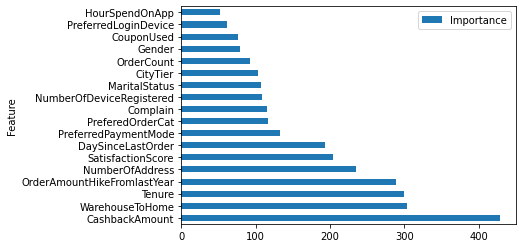

In [251]:
importance = get_importance(model, X_train)

In [ ]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lgbm')

In [ ]:
importance = get_importance(model, X_train)

We will follow following Pipeline:
    •	split
    •	impute missing with XGB
    •	Target enc for categorical columns
    •	remove outliers
    •	Standardize
    •	Train LGBM

In [ ]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='xgb', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
.X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lgbm')

In [ ]:
importance = get_importance(model, X_train)

We will follow following Pipeline:
    •	split
    •	impute missing with RF
    •	Target enc for categorical columns
    •	remove outliers
    •	Standardize
    •	Train LGBM

In [ ]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='rf', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lgbm')

In [ ]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='ohe')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lgbm')

In [ ]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='label')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Standardize
X_train, X_test = scale(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lgbm')

In [ ]:
importance = get_importance(model, X_train)

In [ ]:
explain(model, X_test)

In [ ]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Remove outliers
X_train, X_test = fix_outliers(num_cols, X_train, X_test)

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='lgbm')

In [ ]:
importance = get_importance(model, X_train)
importance = get_importance(model, X_train)

## Random Forest

We will follow following Pipeline:


    •	split
    •	impute missing with median
    •	label encoder for categorical columns
    •	treating outliers
    •	Standardize
    •	Train LGBM

In [ ]:
# split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='rf', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='rf')

We will follow the following pipeline:

    - split
    - impute missing values with XGB
    - Target encoding for categorical columns
    - Train Random Forest

In [ ]:
# Split
X_train, X_test, y_train, y_test = get_train_test()

# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='xgb', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='rf')

In [ ]:
importance = get_importance(model, X_train)

We will follow the following pipeline:

- split
- impute missing values with median
- Target encoding for categorical columns
- Discretisation
- Target encoding for Discretisation
- Train Random Forest with parameters

In [ ]:
# Split
X_train, X_test, y_train, y_test = get_train_test()
                                                                                                                                                                                                                                                                                                                 
# Missing value imputation
X_train, X_test = impute_missing(missing_columns, X_train, X_test, method='median', get_indicator=False, cat=cat_cols)

# Categorical variable encoding
X_train, X_test = encode_categories(cat_cols, X_train, X_test, method='target')

# Discretisation
X_train, X_test = discretise(missing_columns, 9, X_train, X_test)

# categorical variable encoding
X_train, X_test = encode_categories(missing_columns, X_train, X_test, method='Target')
# Train & evaluate
model = train_test(X_train, X_test, y_train, y_test, algo='rf', params= {'n_estimators':5000, 'max_depth': 10, 'max_features':'sqrt'})